# Project :Network traffic analysis

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import random

We use pandas, matplotlib.pyplot, os and random imports for implementing a Random Forest algorithm. 
These libraries and modules provide useful functionality for data manipulation, visualization, and random operations.

import pandas as pd: Imports the pandas library and assigns it the alias "pd". 
This library is a data analysis that offers flexible and efficient data structures, such as DataFrames, that can be used to store and manipulate the data used in training and evaluating a Random Forest model.

import matplotlib.pyplot as plt: Imports the pyplot module from the matplotlib library and assigns it the alias "plt". 
Matplotlib is a Python visualization library, and pyplot provides an interface for creating plots and visualizations. 

import os: Imports the "os" module that provides functions to interact with the operating system. 
We use it for access to filepaths, create directories, verify the existence of files, among other operations related to the manipulation of files or directories necessary in the development of the algorithm.

import random: Imports the "random" module that provides functions for generating random numbers and performing random operations.



## Join different network traffic

In [33]:
# Define la ruta de los archivos CSV en crudo
raw_data_path = r"../Dataset en Crudo"

# Busca todos los archivos CSV en la ruta
csv_files = [f for f in os.listdir(raw_data_path) if f.endswith('.csv')]

# Crea una lista vacía para almacenar los DataFrames
dataframes = []

# Itera sobre cada archivo CSV y agrega su DataFrame a la lista
for csv_file in csv_files:
    file_path = os.path.join(raw_data_path, csv_file)
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
    dataframes.append(df)

# Concatena todos los DataFrames en uno solo
final_df = pd.concat(dataframes, ignore_index=True)

# Define la ruta y el nombre del archivo final
output_path = r"../Dataset Crudo Proceso de Clasificación/output.csv"

# Guarda el archivo final en la ruta especificada
final_df.to_csv(output_path, index=False)

print("Archivo final guardado en: ", output_path)

Archivo final guardado en:  ../Dataset Crudo Proceso de Clasificación/output.csv


This code finds all the CSV files in a directory, loads them into separate DataFrames, and then concatenates them into a single DataFrame. Finally, it saves this DataFrame to a specified CSV file.

Defines the path of the directory containing the raw CSV files: raw_data_path = r"../Dataset in Raw"

It uses the os.listdir() function to find all CSV files in the specified directory and stores them in the csv_files list.

Creates an empty list called dataframes that will be used to store the DataFrames of the CSV files.

Iterates over each CSV file in csv_files. For each file, create the full path using os.path.join() and then use pandas' pd.read_csv() to read the CSV file and load it into a DataFrame called df. Next, add this DataFrame to the dataframes list.

Use pandas' pd.concat() to concatenate all the DataFrames in the dataframes list into a single DataFrame called final_df. The ignore_index=True parameter is used to reset the indexes of the resulting DataFrame.

Define the path and name of the final file using output_path.

Use the pandas to_csv() method on the final_df DataFrame to save the final file to the path specified by output_path . The index=False parameter is used to not include the index in the saved CSV file.

Prints the path of the final file saved to the console.


# Data traffic dataset

In [34]:
#read dataset and load it into dataframe
data = r"../Dataset Crudo Proceso de Clasificación/output.csv"
df = pd.read_csv(data, delimiter=',')

# Exploratory analysis of the dataset

For the initial scan of the datset analysis, the rows and columns contained in the dataset are counted using the *"shape"* command.
After this, we start to arrange the dataset, for this the first thing to do is to eliminate the null data that we have, for this we use the command *"dropna"*.

In [35]:
#dataset dimension
shape = df.shape
print(f"Columns: {shape[1]}, Rows: {shape[0]}")

#Remove null data or clean the dataset of garbage elements
df = df.dropna()
print(f"Dataset dimension with no null or bad data \nColumns: {df.shape[1]}, Rows: {df.shape[0]}\n")

Columns: 7, Rows: 585462
Dataset dimension with no null or bad data 
Columns: 7, Rows: 585395



Now we review what is the information contained in the dataset using *"info"*, in this case it contains **585462 data** in 7 columns and these have a division as follows with different data types

*   No.          int64  
*   Time         float64
*   Source       object 
*   Destination  object
*   Protocol     object 
*   Length       int64  
*   Info         object 

In [36]:
#Data frame summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585395 entries, 0 to 585461
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No.          585395 non-null  int64  
 1   Time         585395 non-null  float64
 2   Source       585395 non-null  object 
 3   Destination  585395 non-null  object 
 4   Protocol     585395 non-null  object 
 5   Length       585395 non-null  int64  
 6   Info         585395 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 35.7+ MB


The list of unique variables in that column is obtained from the column called *"Protocol"*, for this the ***".unique()"*** method is used. Here it gives us how many protocols are in the dataset

In [37]:
# unique values of the 'Protocol' column in the DataFrame df.
print(f"Values of the 'Protocol' \n{df['Protocol'].unique()}")

Values of the 'Protocol' 
['ICMP' 'IPv4' 'DHCPv6' 'ICMPv6' 'ARP' 'DNS' 'TCP' 'SSLv3' 'HTTP' 'TELNET'
 'UDP' 'FTP' 'Messenger' 'MANOLITO' 'THRIFT' 'Gnutella' 'HTTP/XML'
 'IGMPv2' 'IGMPv1' 'RGMP' 'STP' 'CDP' 'Syslog' 'PPP LCP' 'L2TP' 'TLSv1'
 'OCSP' 'RADIUS' 'WSP' 'DHCP' 'PPPoED' 'PPP CHAP' 'PPP IPCP' 'PPP IPV6CP'
 'NTP' 'SIP' 'PPP PAP' 'SIP/SDP' 'RTP' 'Portmap' 'MOUNT' 'NFS' 'RPC'
 'PTPv2' 'SMB2' 'SMTP' 'SMTP/IMF' 'BROWSER' 'SNMP' 'UFTP' 'IGMPv3'
 'FTP-DATA' 'MDNS' 'TLSv1.2' 'SSDP' 'TLSv1.3' 'QUIC' 'HTTP/JSON'
 'PKIX-CRL' 'XMPP/XML' 'LLMNR' 'NNTP' 'SSL' 'SSLv2' 'NBNS']


Now the frequency of each of the variables is calculated, in this case obtaining that the TCP protocol has the highest frequency with ***419540 data***.

In [38]:
# Calculate the frequency of each protocol
df['Protocol'].value_counts()

TCP         419540
TLSv1.3      56373
DNS          44463
TLSv1.2      22038
SNMP         11047
             ...  
Gnutella         2
MANOLITO         2
PPP PAP          2
PKIX-CRL         1
SMTP/IMF         1
Name: Protocol, Length: 65, dtype: int64

After knowing the amount of data, a bar chart is made with all the protocols to make it easier to understand the frequency with which each protocol appears in the dataset.

Here it is shown that out of the 65 protocols there are only data in 24 protocols, some of which have more frequency than others.

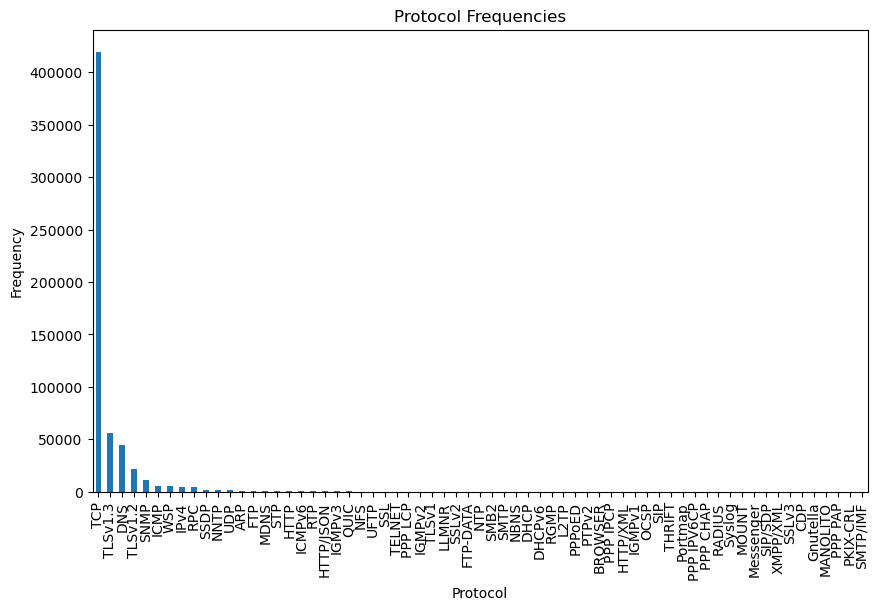

In [40]:
#Create a bar chart to show the frequency of each protocol in the data set

# Calculate the frequency of each protocol
protocol_freq = df['Protocol'].value_counts()

# Create a bar chart for the protocol frequencies
protocol_freq.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Protocol')
plt.ylabel('Frequency')
plt.title('Protocol Frequencies')
plt.show()

# Data transformation


In the Data transformstion section we do the same procedure we did initially, that is to define the path of the file to be read and the folder where the new data will be saved, the file is read, and now the *"No"* column is eliminated since it is a column that does not represent important information for the analysis to be performed.

Then, the folder is created to avoid any inconvenience of non-existence, then the dictionary that will store the DataFrames of each protocol is created.

Now we filter the results by the layer 3 protocols that we want to take into account for this network traffic analysis, here we verify that there are enough rows for each protocol since we want to level the amount of data to be analyzed, in this case we left 700 as the amount of data for each protocol.

Finally, each dataframe is saved in a separate csv file. 

In [41]:
# Define la ruta del archivo CSV y la carpeta para guardar los nuevos archivos
csv_path = r'../Dataset Crudo Proceso de Clasificación/output.csv'
folder_path = r'../Dataset Proceso de Clasificación'

# Lee el archivo CSV en un DataFrame
df = pd.read_csv(csv_path)

# Elimina la columna "No."
df = df.drop('No.', axis=1)

# Crea la carpeta si no existe
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Crea un diccionario para almacenar los DataFrames de cada protocolo
protocol_dfs = {}

# Filtra los resultados del conteo por los protocolos de aplicación conocidos
app_protocols = ['HTTP', 'DNS', 'TCP', 'FTP', 'ICMP', 'UDP']
for protocol in app_protocols:
    # Verifica si hay suficientes filas en el DataFrame para el protocolo actual
    if (df['Protocol'] == protocol).sum() <= 700:
        data = (df['Protocol'] == protocol).sum()
        print(data)
        print(f"No hay suficientes filas para el protocolo {protocol}")
        continue
    
    # Selecciona 700 filas aleatorias del DataFrame para cada protocolo
    random.seed(42)
    protocol_df = df.loc[df['Protocol'] == protocol].sample(n=700, random_state=42)
    protocol_dfs[protocol] = protocol_df

# Guarda cada DataFrame en un archivo CSV separado
for protocol, protocol_df in protocol_dfs.items():
    filename = f'{protocol.lower()}_output.csv'
    file_path = os.path.join(folder_path, filename)
    protocol_df.to_csv(file_path, index=False)

# Dataset Consolidation

In the Dataset Consolidation section you define the path to the folder that contains each of the csv files that were previously created.

Then an empty list is created where the Dataframes of each CSV file will be stored, then each of these files is read and added to the list that was created.

Now we concatenate the frames so that they are as one and we make the mixture of the rows in a pseudo-random way.

Then this Dateframe mixed in a pseudo-random way is saved in a csv file.

In [42]:
# Define la ruta de la carpeta que contiene los archivos CSV
folder_path = r'../Dataset Proceso de Clasificación'

# Crea una lista vacía para almacenar los DataFrames de cada archivo CSV
dfs = []

# Lee cada archivo CSV en un DataFrame y agrégalo a la lista
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        dfs.append(df)

# Concatena los DataFrames en uno solo
df = pd.concat(dfs, ignore_index=True)

# Mezcla las filas del DataFrame de forma pseudoaleatoria
random.seed(42)
df = df.sample(frac=1).reset_index(drop=True)

# Guarda el DataFrame mezclado en un archivo CSV
mixed_csv_path = r'../Dataset Analisis de redes/dataset.csv'
df.to_csv(mixed_csv_path, index=False)

Now we count again the amount of data per protocol, here we check that in fact all of them have 700 data to have an equal distribution of them.

In [43]:
df['Protocol'].value_counts()

TCP     700
DNS     700
UDP     700
ICMP    700
HTTP    700
FTP     700
Name: Protocol, dtype: int64

These frequencies are then displayed in a bar chart showing the protocol and the amount of data.

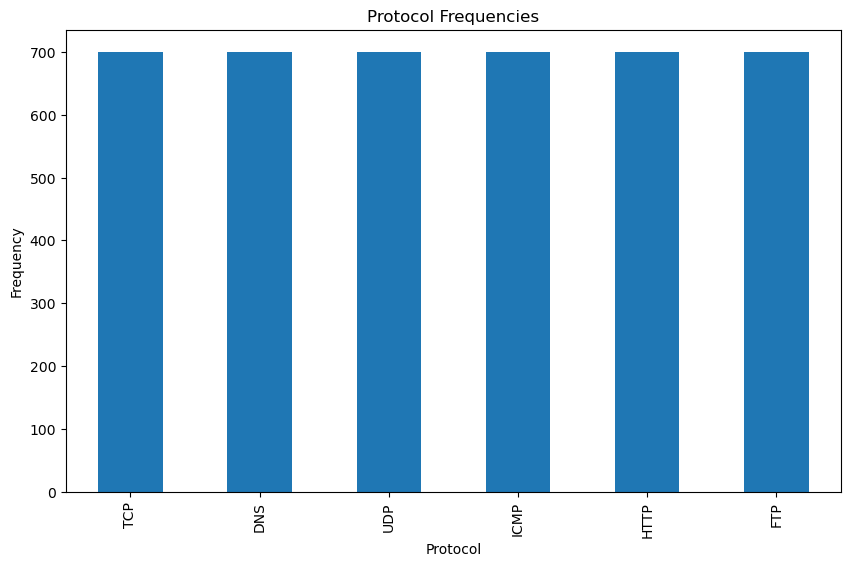

In [44]:
#Create a bar chart to show the frequency of each protocol in the data set

# Calculate the frequency of each protocol
protocol_freq = df['Protocol'].value_counts()

# Create a bar chart for the protocol frequencies
protocol_freq.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Protocol')
plt.ylabel('Frequency')
plt.title('Protocol Frequencies')
plt.show()


A box plot (or box and whisker plot) of the packet lengths in a data set is now created. The box plot is a graphical tool used to represent the distribution of a data set and can be useful for visualizing the distribution of data and detecting outliers in a data set. 

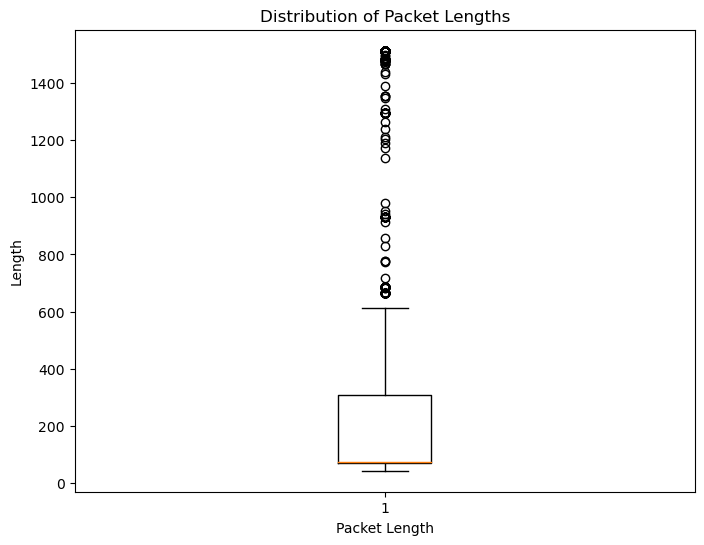

In [45]:
# Create a box plot of packet lengths
plt.figure(figsize=(8, 6))
plt.boxplot(df['Length'])
plt.xlabel('Packet Length')
plt.ylabel('Length')
plt.title('Distribution of Packet Lengths')
plt.show()

Here we are using a *"for"* to create bar charts of the source and destination IP address frequencies for different network protocols. 

First a list called protocols is created containing the names of the network protocols to be analyzed. Then, a for loop is started that loops through each protocol in the protocols list, after which the DataFrame df is filtered to obtain only the rows that correspond to the current protocol in the for loop and the frequencies of the destination IP addresses are obtained in the filtered DataFrame protocol_df.
Now with *"source_freq = protocol_df['Source'].value_counts()"* used to get the frequencies of the source IP addresses in the filtered DataFrame.
Finally, the bar charts of the source and destination IP address frequencies for the network protocols are created. For each protocol, the DataFrame df is filtered to obtain only the rows that correspond to the protocol.

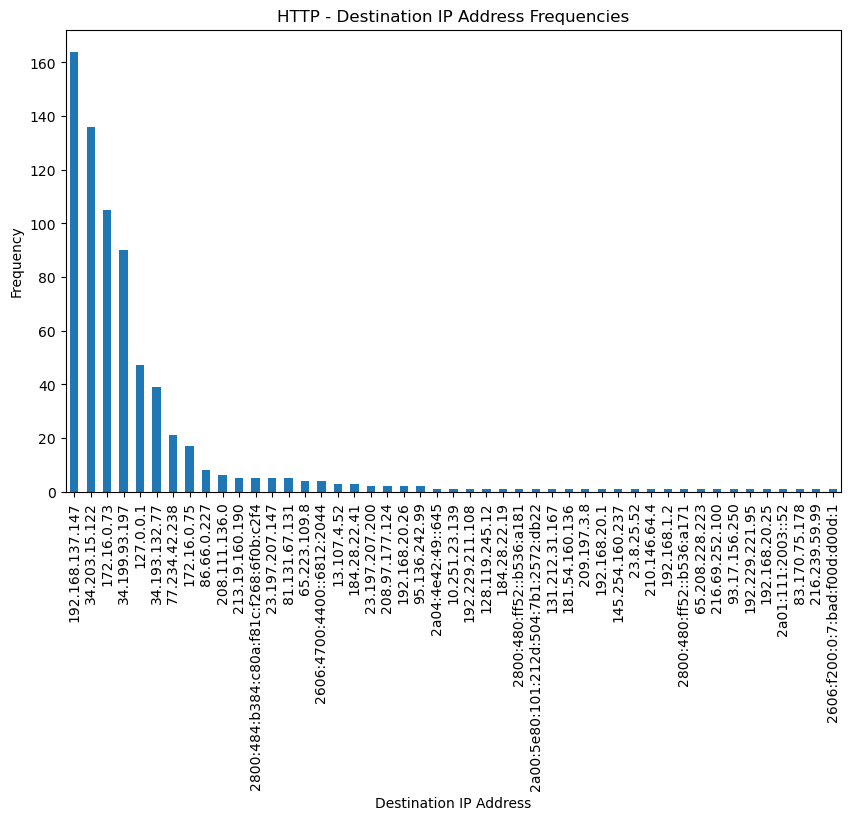

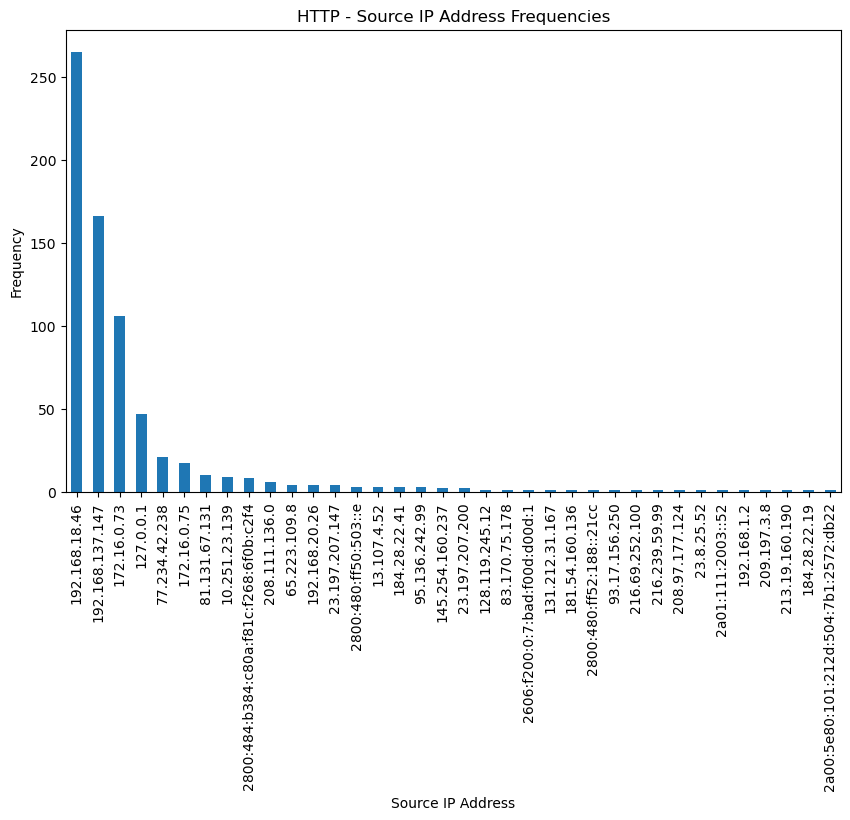

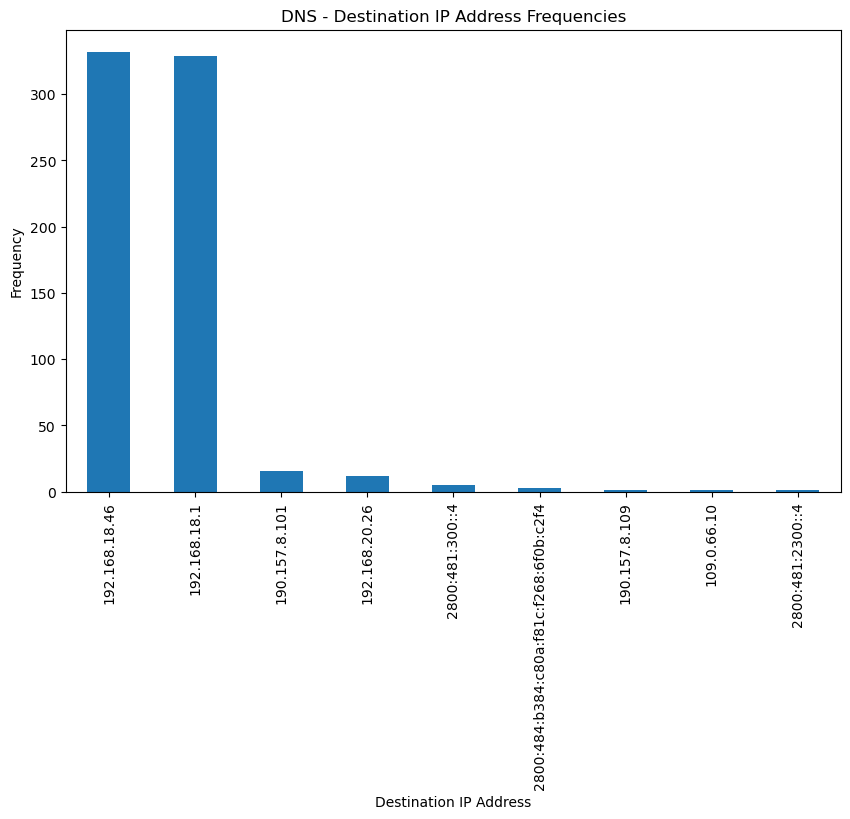

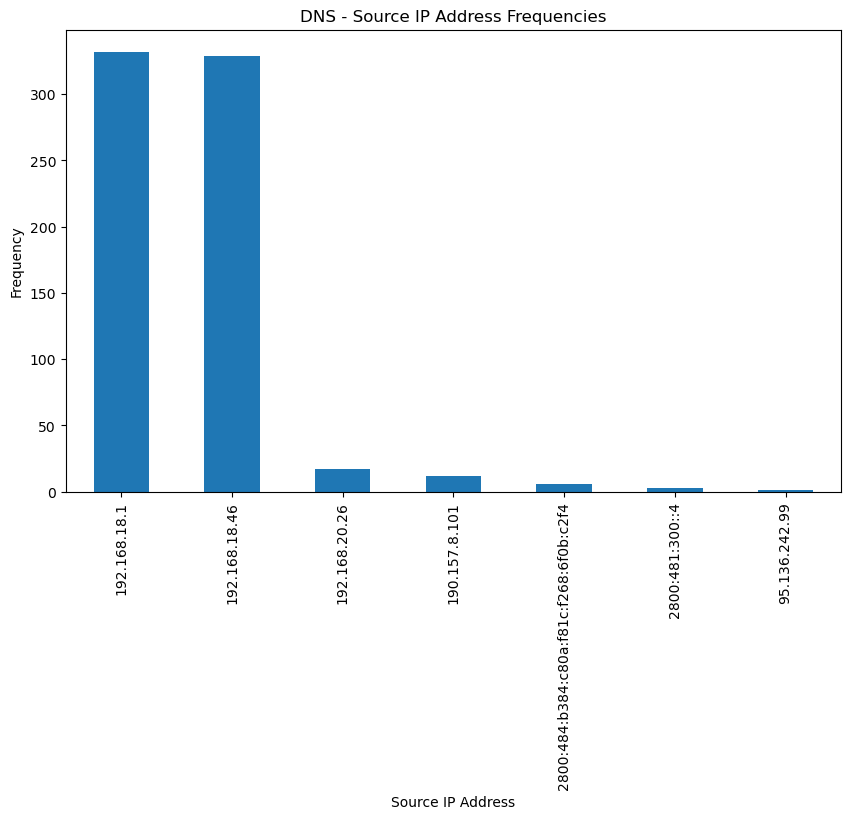

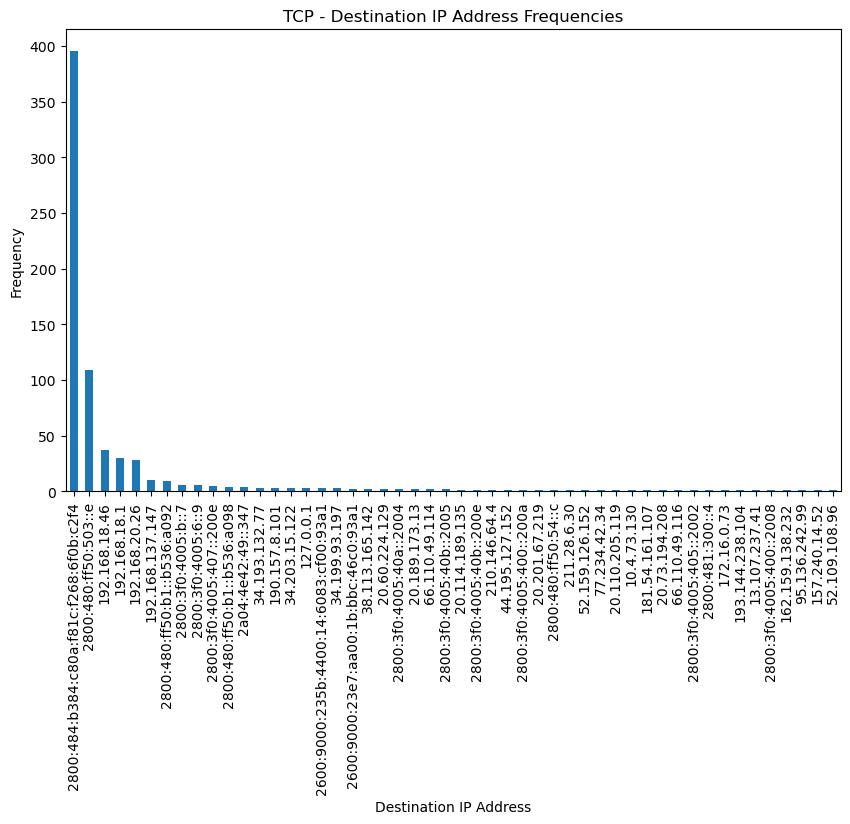

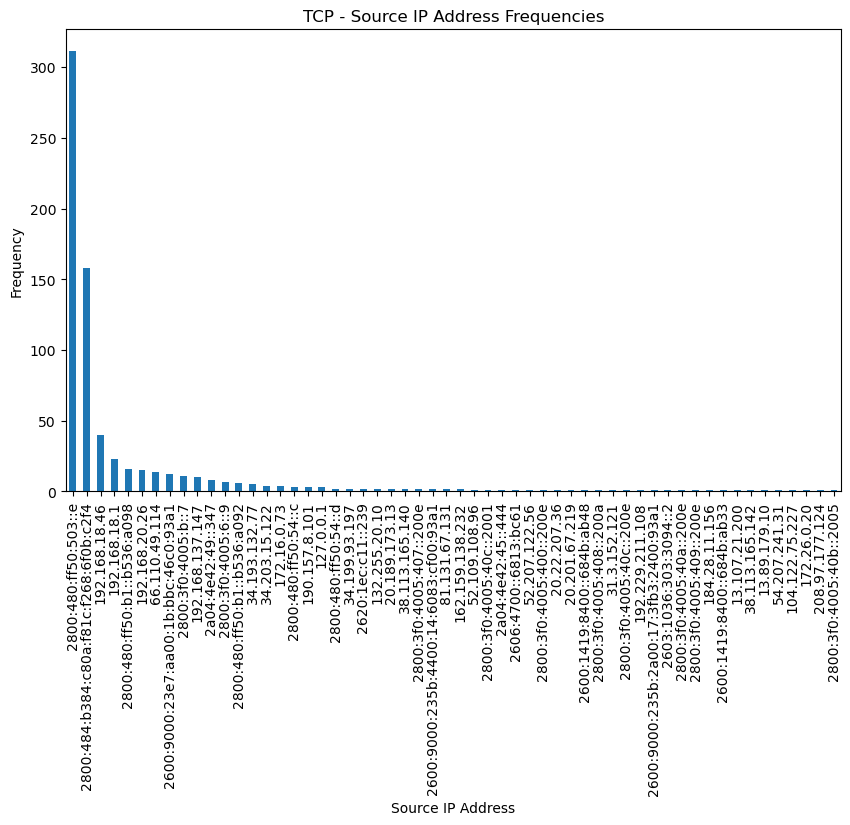

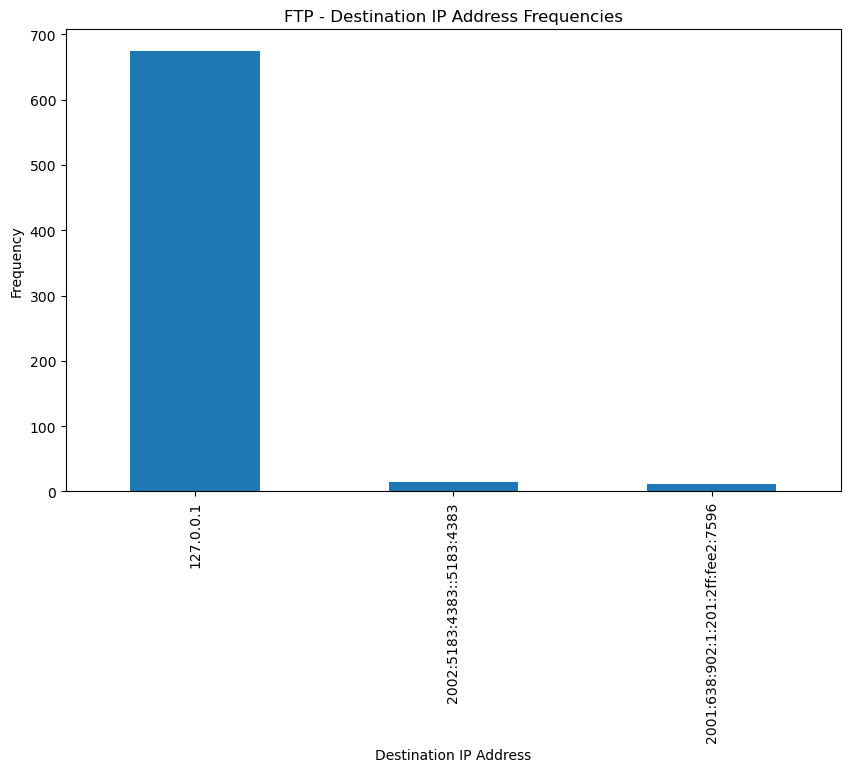

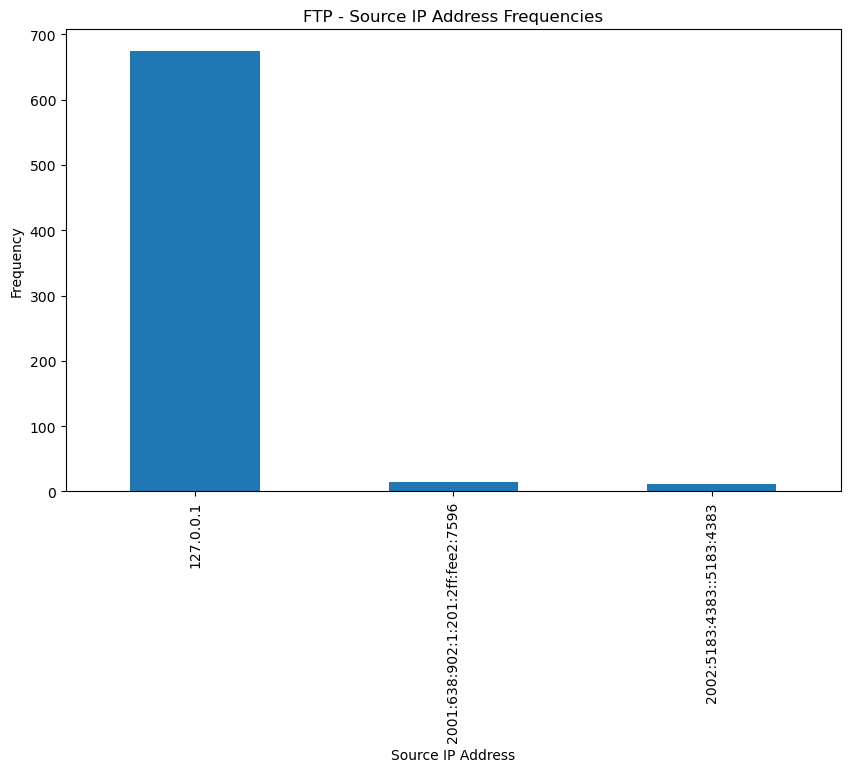

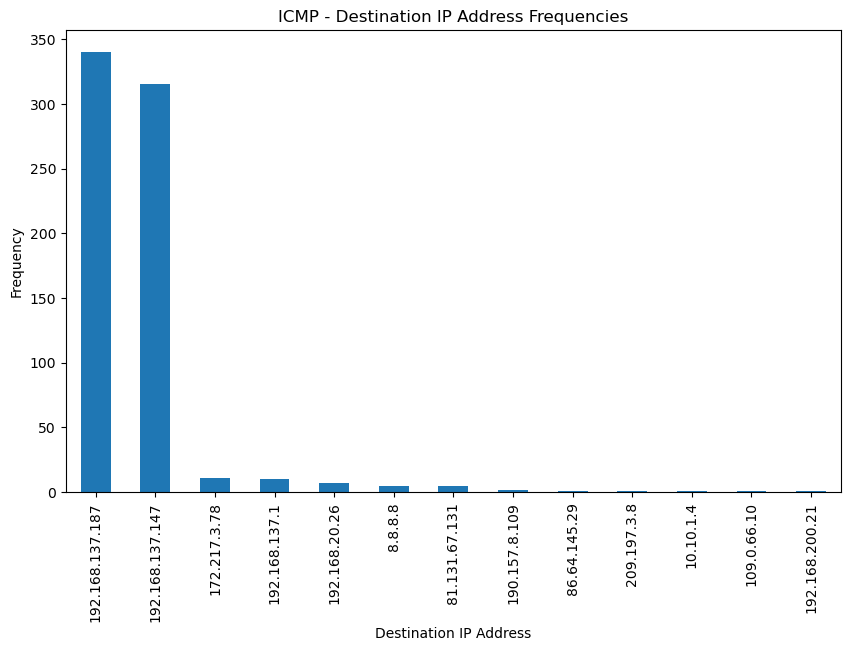

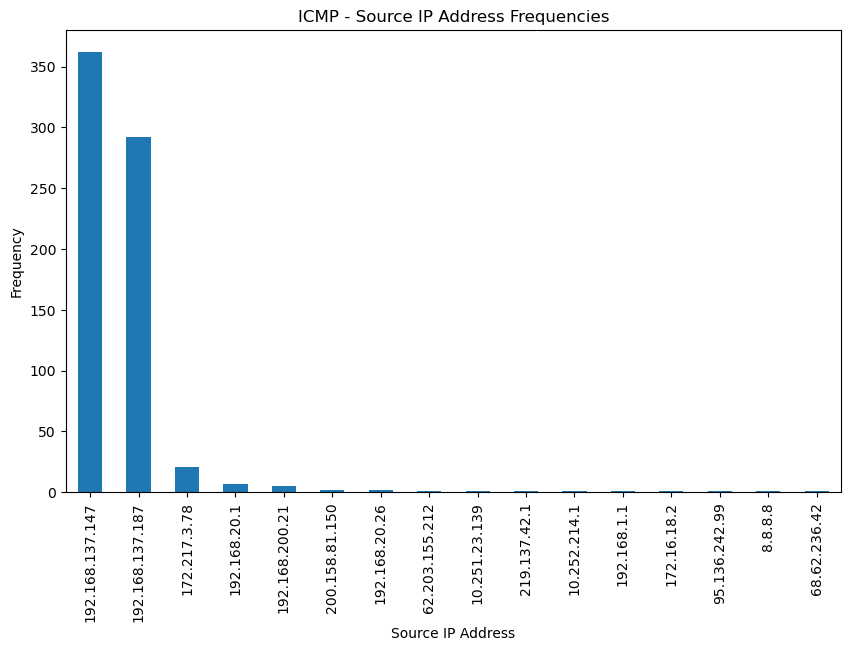

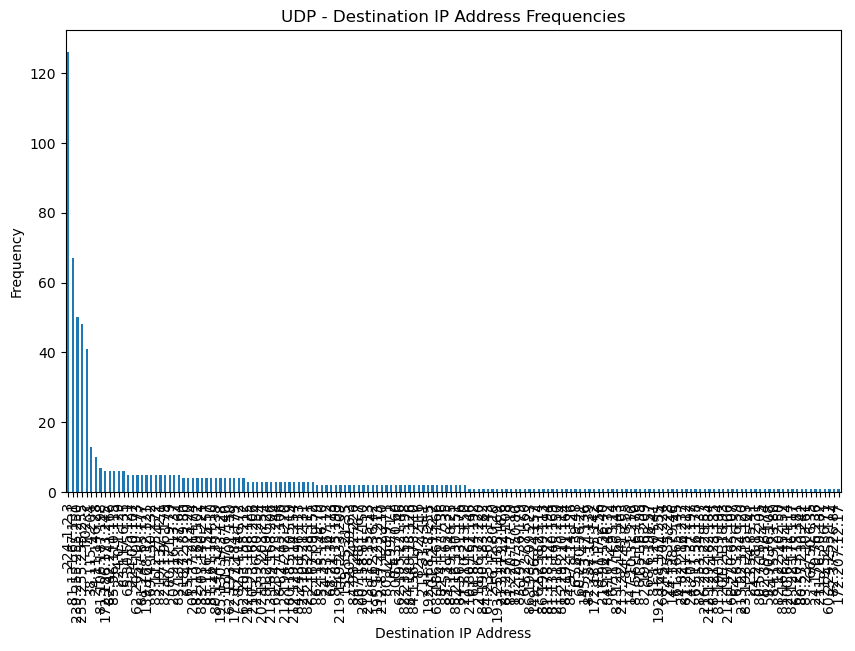

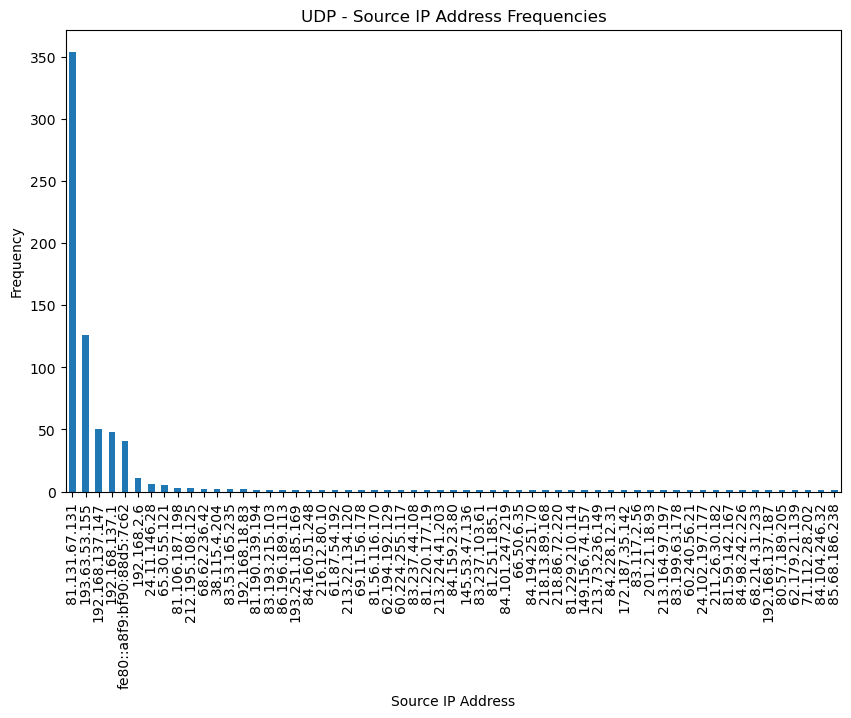

In [46]:
protocols = ['HTTP', 'DNS', 'TCP', 'FTP', 'ICMP', 'UDP']

for protocol in protocols:
    # Filter the DataFrame for the specific protocol
    protocol_df = df[df['Protocol'] == protocol]
    
    # Get the frequency of the destination IP addresses
    destination_freq = protocol_df['Destination'].value_counts()

    # Get the frequency of the source IP addresses
    source_freq = protocol_df['Source'].value_counts()

    # Create a bar chart for the destination IP address frequencies
    destination_freq.plot(kind='bar', figsize=(10, 6))
    plt.xlabel('Destination IP Address')
    plt.ylabel('Frequency')
    plt.title(f'{protocol} - Destination IP Address Frequencies')
    plt.show()

    # Create a bar chart for the source IP address frequencies
    source_freq.plot(kind='bar', figsize=(10, 6))
    plt.xlabel('Source IP Address')
    plt.ylabel('Frequency')
    plt.title(f'{protocol} - Source IP Address Frequencies')
    plt.show()